In [59]:
meanAP_json = "/home/tlips/Documents/diffusing-synthetic-data/meanAP_dict.json"
AKD_json = "/home/tlips/Documents/diffusing-synthetic-data/AKD_dict.json"
median_KD_json = "/home/tlips/Documents/diffusing-synthetic-data/median_KD_dict.json"


In [60]:
# read the dicts
import json
with open(meanAP_json, "r") as f:
    meanAP_dict = json.load(f)
with open(AKD_json, "r") as f:
    AKD_dict = json.load(f)
with open(median_KD_json, "r") as f:
    median_KD_dict = json.load(f)
    

In [61]:
# combine the dicts into a single table
# for the akd and median, average over all channels

for key in median_KD_dict.keys():
    median_KD_dict[key]["avg"] = sum(median_KD_dict[key].values())/len(median_KD_dict[key])
for key in AKD_dict.keys():
    AKD_dict[key]["avg"] = sum(AKD_dict[key].values())/len(AKD_dict[key])


In [62]:
# combine meanAP with avg AKD and median KD into a single table
table = {}
for key in meanAP_dict.keys():
    table[key] = {"meanAP": meanAP_dict[key], "AKD": AKD_dict[key]["avg"], "median_KD": median_KD_dict[key]["avg"]}
# parse the category by checking the key for keywords: must be (tshirt, shoe or mug)
for key in table.keys():
    if "tshirt" in key.lower():
        table[key]["category"] = "tshirt"
    elif "shoe" in key.lower():
        table[key]["category"] = "shoe"
    elif "mug" in key.lower():
        table[key]["category"] = "mug"
    else:
        table[key]["category"] = "unknown"

# parse the experiment , must be in (real, random, blip, gemini, class)
for key in table.keys():
    if "real" in key.lower():
        table[key]["experiment"] = "real"
    elif "random" in key.lower():
        table[key]["experiment"] = "random"
    elif "blip" in key.lower():
        table[key]["experiment"] = "prompts-blip"
    elif "gemini" in key.lower():
        table[key]["experiment"] = "prompts-gemini"
    elif "class" in key.lower():
        table[key]["experiment"] = "prompts-classname"
    else:
        table[key]["experiment"] = "unknown"

In [63]:
# create pd dataframe
import pandas as pd
df = pd.DataFrame.from_dict(table, orient="index")
df = df.reset_index()
df


,index,meanAP,AKD,median_KD,category,experiment
0,REAL_MUGS_RUN,0.450494,21.651690,13.028271,mug,real
1,REAL_SHOES_RUN,0.500529,33.652853,10.144249,shoe,real
2,REAL_TSHIRTS_RUN,0.676969,25.591931,4.182577,tshirt,real
3,RANDOM_TEXTURES_MUGS_RUN,0.512807,18.348631,9.985161,mug,random
4,RANDOM_TEXTURES_SHOES_RUN,0.588594,13.422844,7.414509,shoe,random
5,RANDOM_TEXTURES_TSHIRTS_RUN,0.577112,37.928270,6.305799,tshirt,random
6,PROMPT_CLASSNAME_MUGS_RUN,0.480365,22.741871,10.878651,mug,prompts-classname
7,PROMPT_CLASSNAME_SHOES_RUN,0.535737,23.361332,8.931762,shoe,prompts-classname
8,PROMPT_CLASSNAME_TSHIRTS_RUN,0.433131,66.358391,13.634571,tshirt,prompts-classname
9,PROMPT_GEMINI_MUGS_RUN,0.475117,17.411782,10.797770,mug,prompts-gemini


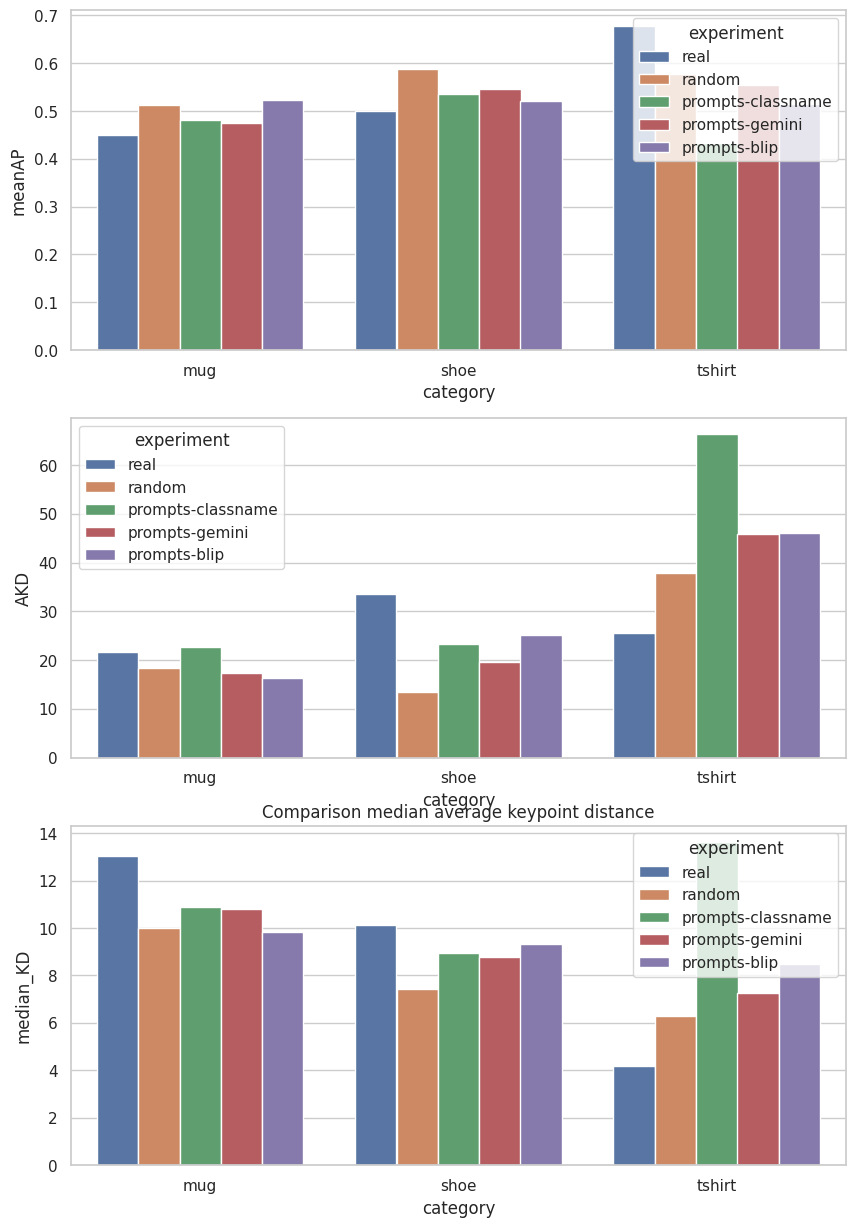

In [64]:
# create a barplot comparing the meanAP, AKD and median KD for each category
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
sns.barplot(x="category", y="meanAP", hue="experiment", data=df, ax=ax[0])
plt.title("Comparison of meanAP")
sns.barplot(x="category", y="AKD", hue="experiment", data=df, ax=ax[1])
plt.title("Comparison average average keypoint distance")
sns.barplot(x="category", y="median_KD", hue="experiment", data=df, ax=ax[2])
plt.title("Comparison median average keypoint distance")
plt.show()

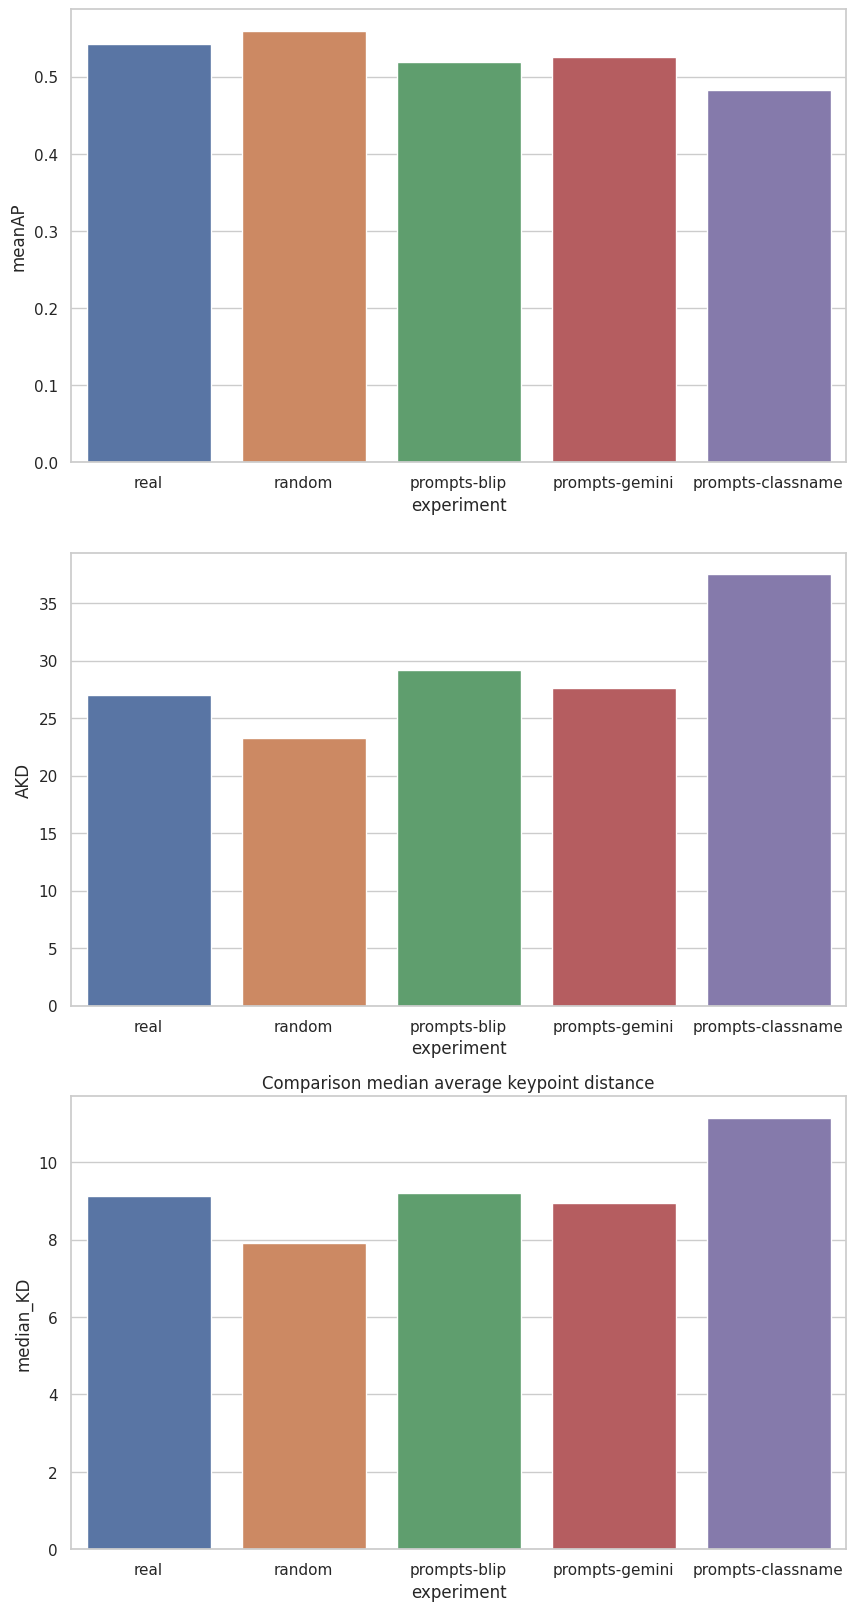

In [65]:
# create similar barchart but average accross the categories, use same color coding
df_avg = df.groupby("experiment").mean(numeric_only=True).reset_index()

# put the real experiments on the left, and the prompts on the right
df_avg = df_avg.sort_values(by="experiment", key=lambda x: x.map({"real":0, "random":1, "prompts-blip":2, "prompts-gemini":3, "prompts-classname":4}))

fig, ax = plt.subplots(3, 1, figsize=(10, 20))
sns.barplot(x="experiment", y="meanAP", data=df_avg, ax=ax[0],hue="experiment")
sns.barplot(x="experiment", y="AKD", data=df_avg, ax=ax[1],hue="experiment")
plt.title("Comparison average average keypoint distance")
sns.barplot(x="experiment", y="median_KD", data=df_avg, ax=ax[2],hue="experiment")
plt.title("Comparison median average keypoint distance")
plt.show()